# Healthcare Stroke

                                                                                                    -Uday Kumar S

Project : Stroke Prediction

Task : The first thing we have to do is labelling the string value into number and then change the column data types into integer, so the machine learning model can understand the data with integer data types. Then we have to do the Exploratory Data Analysis, we can visualize how many people are at risk having stroke and not. The last step is build the machine learning model and visualize the machine learning model, Decision Tree. 


## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/rogudays/Documents/Adverks-Data_Science/Assignement/healthcare-stroke/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Understanding the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [9]:
df.gender=df.gender.apply(lambda x:'Male' if 'Male' in x else 'Female')

In [10]:
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [11]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [12]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [13]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [14]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [16]:
mean_bmi_men=df[df['gender']=='Male']['bmi'].mean()
mean_bmi_women=df[df['gender']=='Female']['bmi'].mean()

In [17]:
df.loc[(df.bmi.isnull())&(df['gender']=='Male'),'bmi']=mean_bmi_men
df.loc[(df.bmi.isnull())&(df['gender']=='Female'),'bmi']=mean_bmi_women

## Feature Engineering

In [18]:
def convert_to_buckets(avg_glucose_level):
    if avg_glucose_level<80:
        return '0 - 80'
    elif avg_glucose_level<150:
        return '80 - 150'
    elif avg_glucose_level<200:
        return '150 - 200'
    else:
        return '> 200'

In [19]:
df['avg_gluscose_level']=df['avg_glucose_level'].map(convert_to_buckets)
df['avg_gluscose_level'].value_counts()

80 - 150     2849
0 - 80       1530
> 200         434
150 - 200     297
Name: avg_gluscose_level, dtype: int64

In [20]:
def convert_to_buckets(bmi):
    if bmi<18.5:
        return 'Underweight'
    elif bmi<25:
        return 'Normalweight'
    elif bmi<30:
        return 'Overweight'
    else:
        return 'Obesse'

In [21]:
df['bmi']=df['bmi'].map(convert_to_buckets)
df['bmi'].value_counts()

Obesse          1920
Overweight      1610
Normalweight    1243
Underweight      337
Name: bmi, dtype: int64

## Modelling

In [22]:
cols=df.columns
all_cat_cols=list(cols)

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in all_cat_cols:
    df[col]=labelencoder.fit_transform(df[col])
df[all_cat_cols].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_gluscose_level
0,671,1,88,0,1,1,2,1,3850,1,1,1,3
1,3610,0,82,0,0,1,3,0,3588,2,2,1,3
2,2151,1,101,0,1,1,2,0,2483,1,2,1,2
3,4226,0,70,0,0,1,2,1,3385,1,3,1,1
4,114,0,100,1,0,1,3,0,3394,0,2,1,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=df.drop(['stroke'], axis=1)
y=df['stroke']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred_gini=dtc.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index : {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index : 0.9090


In [33]:
print('Training set score : {:.4f}'.format(dtc.score(X_train,y_train)))
print('Test set score : {:.4f}'.format(dtc.score(X_test,y_test)))

Training set score : 1.0000
Test set score : 0.9090


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print('To evaluate the performance of test data on the model \n', classification_report(y_test,dtc.predict(X_test)))
print('To evaluate the performance of train data on the model \n', classification_report(y_train,dtc.predict(X_train)))

To evaluate the performance of test data on the model 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.22      0.19      0.21        62

    accuracy                           0.91      1022
   macro avg       0.59      0.57      0.58      1022
weighted avg       0.90      0.91      0.91      1022

To evaluate the performance of train data on the model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3901
           1       1.00      1.00      1.00       187

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



## Visualize Decision-trees

In [50]:
classification_report(y_test,dtc.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95       960\n           1       0.23      0.21      0.22        62\n\n    accuracy                           0.91      1022\n   macro avg       0.59      0.58      0.59      1022\nweighted avg       0.91      0.91      0.91      1022\n'

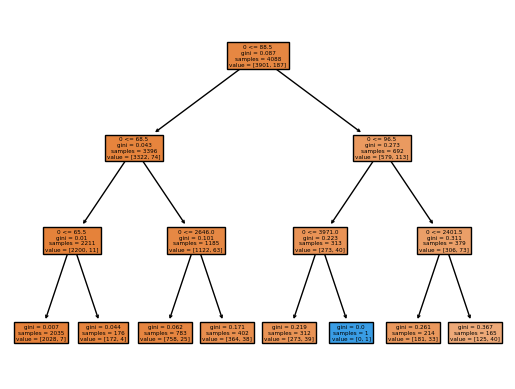

In [53]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X=X_train, y=y_train)

from sklearn.tree import plot_tree

plot_tree(decision_tree=model, feature_names=y_pred_gini, filled=True);